FakeNewsNet Dataset 
* Fake and real news from Gossip Cop and Politifact
* Gossip Cop fake news - 5323 rows, 4 columns
* Gossip Cop real news - 16817 rows, 4 columns
* Politifact fake news - 432 rows, 4 columns
* Politifact real news - 624 rows, 4 columns

* Total fake news - 5755
* Total real news - 17441
* Problem - dataset imbalanced real news three times more than fake news
* SMOTE applied
* Naive Bayes, Logistic Regression, XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Buzzfeed Fake News and Real News
gossip_fn = pd.read_csv("/content/drive/MyDrive/gossipcop_fake.csv")
gossip_tn = pd.read_csv("/content/drive/MyDrive/gossipcop_real.csv")

In [4]:
gossip_fn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [5]:
gossip_tn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [6]:
gossip_fn.shape

(5323, 4)

In [7]:
gossip_tn.shape

(16817, 4)

In [8]:
#Politifact fake and real news
politi_fn = pd.read_csv("/content/drive/MyDrive/politifact_fake.csv")
politi_tn = pd.read_csv("/content/drive/MyDrive/politifact_real.csv")

In [9]:
politi_fn.head(5)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [10]:
politi_tn.head(5)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [11]:
politi_fn.shape

(432, 4)

In [12]:
politi_tn.shape

(624, 4)

In [13]:
#Check for any missing values
#No missing values in title, text - the columns going to be used
gossip_fn.isnull().values.any()
gossip_fn.isnull().sum()

id             0
news_url     256
title          0
tweet_ids    188
dtype: int64

In [14]:
gossip_tn.isnull().sum()

id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64

In [15]:
politi_fn.isnull().sum()

id            0
news_url      4
title         0
tweet_ids    40
dtype: int64

In [16]:
politi_tn.isnull().sum()

id             0
news_url      57
title          0
tweet_ids    215
dtype: int64

In [17]:
#Combine buzzfeed and politifact fake news 
# id             
# news_url     
# title          
# tweet_ids
fakenews = np.concatenate((politi_fn, gossip_fn))
fakenews.shape

(5755, 4)

In [18]:
#Combine buzzfeed and politifact real news 
realnews = np.concatenate((politi_tn, gossip_tn))
realnews.shape

(17441, 4)

In [19]:
#Take only the columns needed
columns = ['id','news_url','title','tweet_ids']
fakenews = pd.DataFrame(fakenews, columns = columns)
fakenews = fakenews[['id','title']]
fakenews.head(5)

,id,title
0,politifact15014,BREAKING: First NFL Team Declares Bankruptcy O...
1,politifact15156,Court Orders Obama To Pay $400 Million In Rest...
2,politifact14745,UPDATE: Second Roy Moore Accuser Works For Mic...
3,politifact14355,Oscar Pistorius Attempts To Commit Suicide
4,politifact15371,Trump Votes For Death Penalty For Being Gay


In [20]:
#fakenews.shape (5755, 2)
ones = np.ones(fakenews.shape[0])
#fakenews.drop(columns=['news_url', 'tweet_ids'])
fakenews = np.column_stack((fakenews, ones))
fakenews = pd.DataFrame(fakenews, columns = ['id','title','flag'])

In [21]:
fakenews.head(5)

,id,title,flag
0,politifact15014,BREAKING: First NFL Team Declares Bankruptcy O...,1.0
1,politifact15156,Court Orders Obama To Pay $400 Million In Rest...,1.0
2,politifact14745,UPDATE: Second Roy Moore Accuser Works For Mic...,1.0
3,politifact14355,Oscar Pistorius Attempts To Commit Suicide,1.0
4,politifact15371,Trump Votes For Death Penalty For Being Gay,1.0


In [22]:
realnews = pd.DataFrame(realnews, columns = columns)
realnews = realnews[['id','title']]
realnews.head(5)

,id,title
0,politifact14984,National Federation of Independent Business
1,politifact12944,comments in Fayetteville NC
2,politifact333,"Romney makes pitch, hoping to close deal : Ele..."
3,politifact4358,Democratic Leaders Say House Democrats Are Uni...
4,politifact779,"Budget of the United States Government, FY 2008"


In [23]:
zeros = np.zeros(realnews.shape[0])
#fakenews.drop(columns=['news_url', 'tweet_ids'])
realnews = np.column_stack((realnews, zeros))
realnews = pd.DataFrame(realnews, columns = ['id','title','flag'])


In [24]:
realnews.head(5)

,id,title,flag
0,politifact14984,National Federation of Independent Business,0.0
1,politifact12944,comments in Fayetteville NC,0.0
2,politifact333,"Romney makes pitch, hoping to close deal : Ele...",0.0
3,politifact4358,Democratic Leaders Say House Democrats Are Uni...,0.0
4,politifact779,"Budget of the United States Government, FY 2008",0.0


In [25]:
allnews = np.concatenate((fakenews, realnews))

In [26]:
allnews.shape

(23196, 3)

In [27]:
allnews = pd.DataFrame(allnews, columns = ['id','title','flag'])
a_list = list(range(0, 23196))
allnews['ind'] = a_list
allnews.set_index('ind', inplace=True)

In [28]:
from sklearn.utils import shuffle
allnews = shuffle(allnews)

In [29]:
allnews.head(5)

,id,title,flag
ind,,,
21140,gossipcop-915351,Selena Gomez And Justin Bieber Couldn't Take T...,0.0
19064,gossipcop-897994,The Bellas are ready to get back in the ring,0.0
1914,gossipcop-6057388222,thenewyorkevening Resources and Information.,1.0
10613,gossipcop-856830,Kris Jenner Granted 3-Year Restraining Order A...,0.0
15059,gossipcop-885195,Paris Hilton Cosmetics Is Inspired by Mermaids...,0.0


In [30]:
allnews.dtypes

id       object
title    object
flag     object
dtype: object

In [31]:
tf_idf = TfidfVectorizer(analyzer='word', stop_words='english', strip_accents = "ascii")
X = tf_idf.fit_transform(allnews['title'])
y = allnews['flag'].astype('int')
# X = X.todense()
np.asarray(X)
np.asarray(y)
Xtr, Xts, ytr, yts = train_test_split(X, y, random_state = 0, test_size = 0.3, stratify=allnews.flag)

In [32]:
MNB = MultinomialNB()
classifier = MNB.fit(Xtr,ytr)
yhat = MNB.predict(Xts)

In [33]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

MNB before SMOTE Confusion matrix, without normalization
[[5134   98]
 [1219  508]]
MNB before SMOTE Normalized confusion matrix
[[0.98126911 0.01873089]
 [0.70584829 0.29415171]]


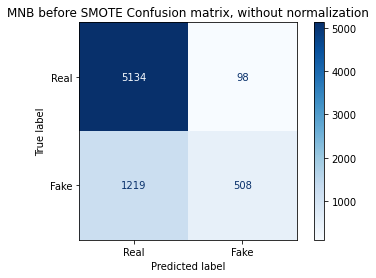

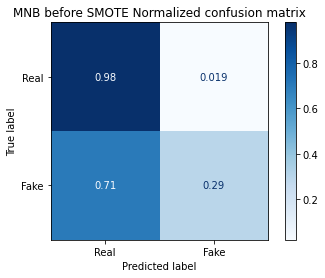

In [34]:
# Plot non-normalized confusion matrix
titles_options = [
    ("MNB before SMOTE Confusion matrix, without normalization", None),
    ("MNB before SMOTE Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [35]:
#Print socres MNB
# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8107486707860325
Precision:  0.8382838283828383
Recall:  0.294151708164447
F1:  0.4354907843977711
AUC:  0.637710410657147


In [36]:
BNB = BernoulliNB()
BNB.fit(Xtr,ytr)
yhat= BNB.predict(Xts) 

BNB before SMOTE Confusion matrix, without normalization
[[5134   98]
 [1219  508]]
BNB before SMOTE Normalized confusion matrix
[[0.98126911 0.01873089]
 [0.70584829 0.29415171]]


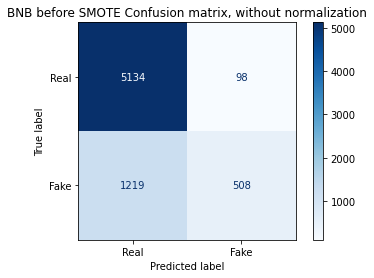

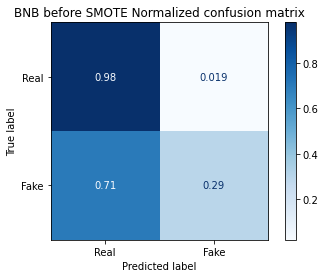

In [37]:
# Plot non-normalized confusion matrix
titles_options = [
    ("BNB before SMOTE Confusion matrix, without normalization", None),
    ("BNB before SMOTE Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [38]:
#Print socres BNB
# print("Cross Val : ", cross_val_score(BNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8212386837189252
Precision:  0.6847742922723795
Recall:  0.5182397220613781
F1:  0.5899802241265656
AUC:  0.7197467723456739


In [39]:
#Xts = np.asarray(Xts)

In [40]:
#Logistic Regression BEFORE SMOTE
LR_Model = LogisticRegression()
LR_Model.fit(Xtr, ytr)
yhat = LR_Model.predict(Xts)
accuracy_score(yts, yhat)

0.8238252622503234

In [41]:
#Print socres LR
print("F1: ", metrics.f1_score(yts, yhat))

F1:  0.5338403041825095


In [42]:
#XGBoost BEFORE SMOTE
xgb = XGBClassifier()
model = xgb.fit(Xtr, ytr)
yhat = xgb.predict(Xts)
accuracy_score(yts, yhat)

0.7996838626239402

In [43]:
print("F1: ", metrics.f1_score(yts, yhat))

F1:  0.3944396177237185


SMOTE on imbalance data 


In [44]:
#https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
X_res, y_res = SMOTE().fit_resample(Xtr, ytr)

In [45]:
from collections import Counter

ctr = Counter(y_res)
print(ctr)

Counter({1: 12209, 0: 12209})


In [46]:
# tf_idf = TfidfVectorizer()
# X_res = tf_idf.fit_transform(allnews['title'])
# y_res = allnews['flag'].astype('int')
# X = X.todense()

In [47]:
np.asarray(X_res)
np.asarray(y_res)
# Xtr, Xts, ytr, yts = train_test_split(X_res, y_res, random_state = 0, test_size = 0.3)

array([1, 0, 0, ..., 1, 1, 1])

In [48]:
MNB = MultinomialNB()
classifier = MNB.fit(X_res,y_res)
yhat = MNB.predict(Xts)

In [49]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

MNB after SMOTE Confusion matrix, without normalization
[[4152 1080]
 [ 421 1306]]
MNB after SMOTE Normalized confusion matrix
[[0.79357798 0.20642202]
 [0.24377533 0.75622467]]


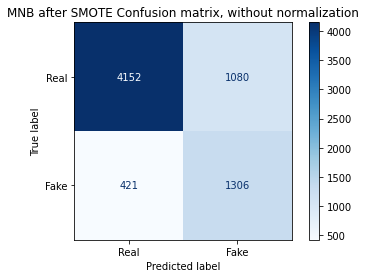

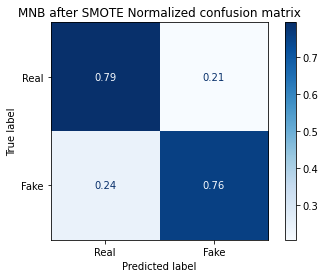

In [50]:
# Plot non-normalized confusion matrix
titles_options = [
    ("MNB after SMOTE Confusion matrix, without normalization", None),
    ("MNB after SMOTE Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [51]:
#Print socres
#MNB F1 score improved from 0.46 to 0.65

# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.784308090242851
Precision:  0.5473595976529757
Recall:  0.7562246670526925
F1:  0.6350595672258692
AUC:  0.7749013243520344


In [52]:
BNB = BernoulliNB()
classifier = BNB.fit(X_res,y_res)
yhat = BNB.predict(Xts)

BNB after SMOTE Confusion matrix, without normalization
[[4434  798]
 [ 553 1174]]
BNB after SMOTE Normalized confusion matrix
[[0.84747706 0.15252294]
 [0.32020845 0.67979155]]


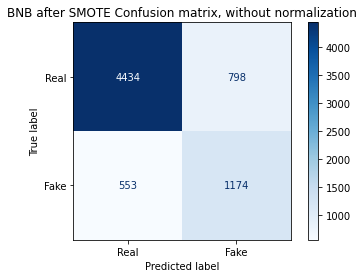

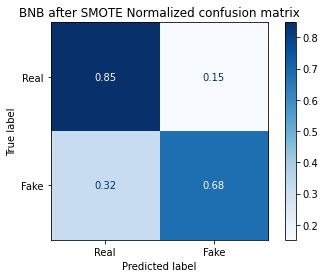

In [53]:
# Plot non-normalized confusion matrix
titles_options = [
    ("BNB after SMOTE Confusion matrix, without normalization", None),
    ("BNB after SMOTE Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [54]:
#Print socres
#BNB F1 score improved from 0.62 to 0.65

# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8058629113378359
Precision:  0.5953346855983773
Recall:  0.6797915460335843
F1:  0.6347661530143283
AUC:  0.7636343051268838


Logistic Regression

In [55]:
#Logistic Regression - before SMOTE 0.83, after SMOTE 0.82
LR_Model = LogisticRegression()
LR_Model.fit(X_res, y_res)
yhat = LR_Model.predict(Xts)
accuracy_score(yts, yhat)

0.8124730564736312

In [56]:
#LR F1 improved from 0.58 to 0.66
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8124730564736312
Precision:  0.6085390946502057
Recall:  0.685002895193978
F1:  0.6445110324162352
AUC:  0.7697759124287933


XGBoost

In [57]:
#XGBoost - before SMOTE 0.80, after SMOTE 0.80
xgb = XGBClassifier()
model = xgb.fit(X_res, y_res)
yhat = xgb.predict(Xts)
accuracy_score(yts, yhat)

0.7880442592326483

In [58]:
#XGBoost F1 improved from 0.40 to 0.53
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.7880442592326483
Precision:  0.5915697674418605
Recall:  0.4713375796178344
F1:  0.5246535610699323
AUC:  0.6819608387385807


In [60]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_res, y_res)
yhat= svm.predict(Xts) 

In [61]:
#SVM 
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8305791061934186
Precision:  0.7718253968253969
Recall:  0.4504921829762594
F1:  0.5689213893967093
AUC:  0.7032659691639707


In [ ]:
#Logistic Regression Text Prediction Test
text = ["There's an ice skating rink in Brooklyn"]
text_features = tf_idf.transform(text)
predictions = LR_Model.predict(text_features)
print(text)
print("Predicted as: {}".format(predictions[0]))

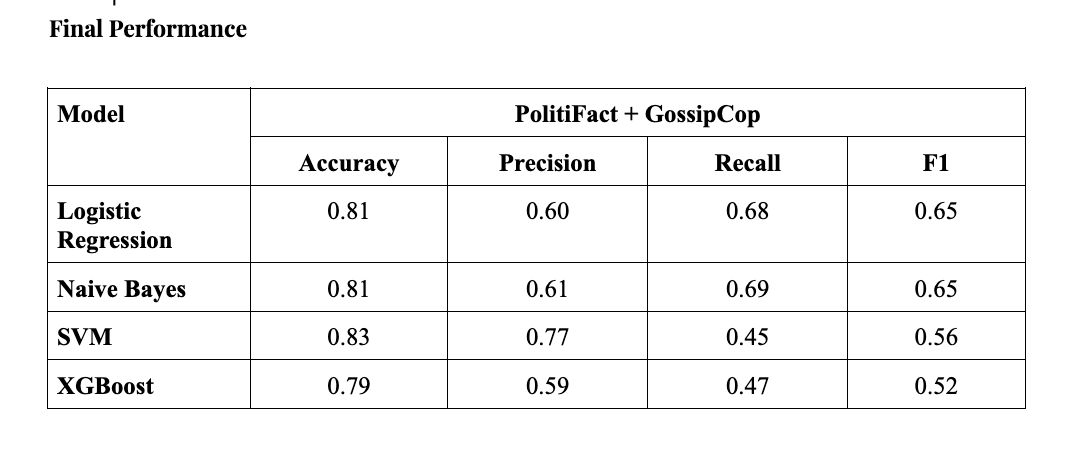

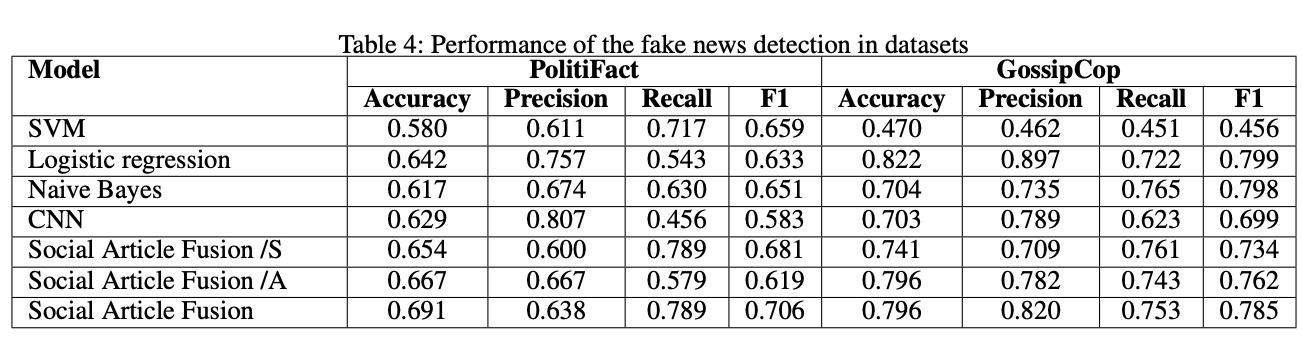

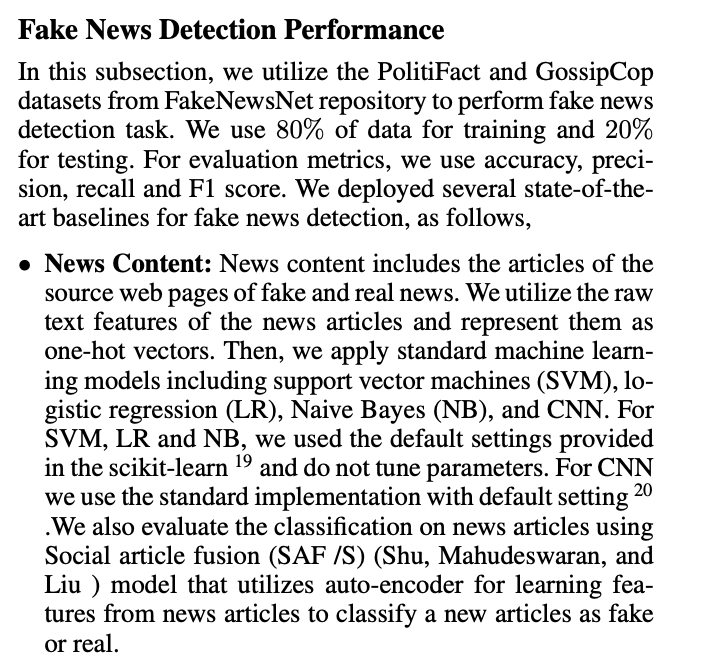

In [ ]:
#The best F1 score so far: LR 0.66 / MNB and BNB around 0.65 / SVM 0.62